<a href="https://colab.research.google.com/github/Younesmoussaoui/chekpoints_SIC/blob/main/chekpoint_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz

In [ ]:
df = pd.read_csv('/content/sample_data/titanic-passengers.csv', sep = ';')
df.head()
df.info
df.describe(include=['object'])
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.Age.fillna(df.Age.mean(),inplace=True)
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Cabin.fillna(df.Cabin.mode()[0],inplace=True)
df['FamilySize']=df.Parch+df.SibSp
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() 
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Survived'] = labelencoder.fit_transform(df['Survived'])

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

In [ ]:
X = df[['Age', 'FamilySize','Pclass','Sex','SibSp']]
XX = ['Age', 'FamilySize','Pclass','Sex']
Y = df['Survived']

In [ ]:
from sklearn import tree
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.39, random_state=1234)
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
print( "Decision tree : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Decision tree : 0.802


Decision tree : 0.828


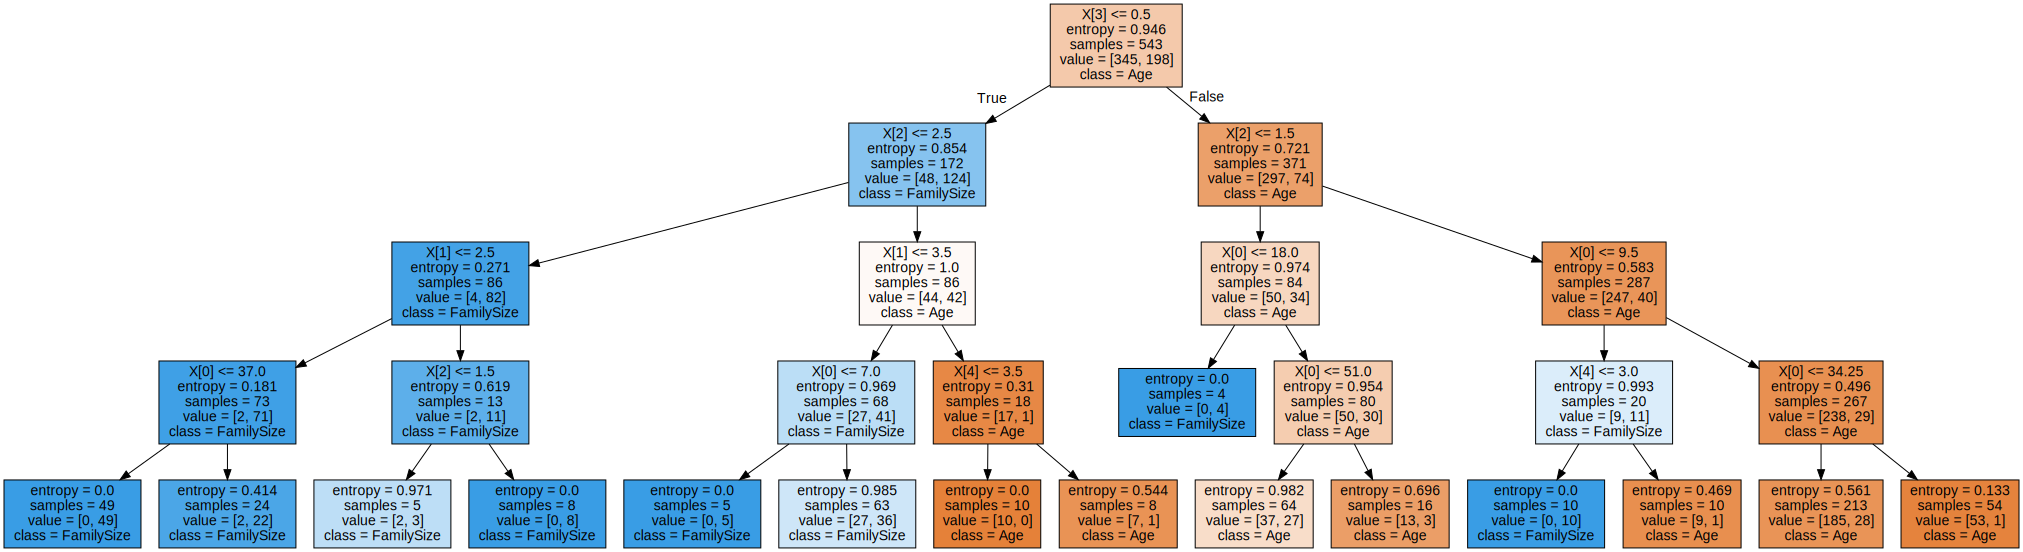

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.39, random_state=1234)
dt = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 4, min_samples_leaf= 4)
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
print( "Decision tree : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))
graph = graphviz.Source(tree.export_graphviz(dt, class_names=XX, filled=True))
graph

On peut dire que la precision de notre modele est depend des parametres de ce dernier .

In [ ]:
X_test.iloc[2]

Age           29.699118
FamilySize     0.000000
Pclass         3.000000
Sex            1.000000
SibSp          0.000000
Name: 760, dtype: float64

# Exemple de prediction manuelle 
Si on prend l'exemple de '' X_test.iloc[2] '' : 

* 1er condition est fausse car sex n'est pas inferieur au egale a 0.5 doc on doit choisit le chemain a droite 

* 2em condition pclass aussi n'est pas inferieur au egale a 1.5 donc on doit choisit le chemain a droite aussi 

* 3em condition la meme chose , l'age egale a 29.699 donc on doit choisit le chemain a droite 

* 4em edition et la derniere , notre age est inferieur a 34 donc notre prediction est 0 car la majorité "185" sons predictions est 0  .

In [35]:
Y_test.iloc[2]

0

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print( "Random forest : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))


Random forest : 0.828


In [38]:
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print("Accuracy : {}".format(round(metrics.accuracy_score(y_test, y_pred), 3)))

Accuracy : 0.852


Lorsque on augmente le nombre des estimateurs , la precesion augmente aussi 